In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

Epoch 1/100
 - 1s - loss: 0.2320 - mean_absolute_error: 0.4623
Epoch 2/100
 - 0s - loss: 0.1932 - mean_absolute_error: 0.4202
Epoch 3/100
 - 0s - loss: 0.1666 - mean_absolute_error: 0.3890
Epoch 4/100
 - 0s - loss: 0.1441 - mean_absolute_error: 0.3607
Epoch 5/100
 - 0s - loss: 0.1240 - mean_absolute_error: 0.3328
Epoch 6/100
 - 0s - loss: 0.1060 - mean_absolute_error: 0.3058
Epoch 7/100
 - 0s - loss: 0.0895 - mean_absolute_error: 0.2796
Epoch 8/100
 - 0s - loss: 0.0747 - mean_absolute_error: 0.2528
Epoch 9/100
 - 0s - loss: 0.0615 - mean_absolute_error: 0.2273
Epoch 10/100
 - 0s - loss: 0.0496 - mean_absolute_error: 0.2018
Epoch 11/100
 - 0s - loss: 0.0393 - mean_absolute_error: 0.1771
Epoch 12/100
 - 0s - loss: 0.0306 - mean_absolute_error: 0.1533
Epoch 13/100
 - 0s - loss: 0.0235 - mean_absolute_error: 0.1316
Epoch 14/100
 - 0s - loss: 0.0179 - mean_absolute_error: 0.1120
Epoch 15/100
 - 0s - loss: 0.0137 - mean_absolute_error: 0.0951
Epoch 16/100
 - 0s - loss: 0.0108 - mean_absolute

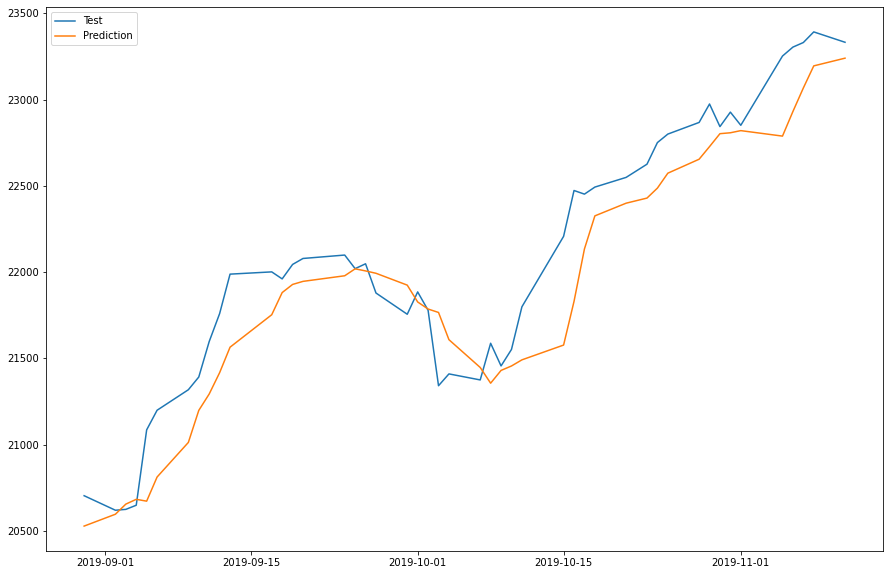

In [284]:
df = pd.read_csv('nikkei.csv', encoding="shift_jis")
L = len(df)
Y = df.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

# train, testデータを定義
X_train = X[:190, :, :]
X_test = X[190:, :, :]
Y_train = Y[:190, :]
Y_test = Y[190:, :]

model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)
Predict = model.predict(X_test)

# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:193,0])

Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[193:,0])

Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[193:,0])

plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [286]:
df

,日付,始値,高値,安値,終値
0,2018/11/9,22471.31,22494.58,22226.01,22250.25
1,2018/11/12,22121.70,22324.01,22046.29,22269.88
2,2018/11/13,21885.24,21892.29,21484.65,21810.52
3,2018/11/14,21851.13,21990.41,21764.88,21846.48
4,2018/11/15,21670.35,21818.73,21613.53,21803.62
...,...,...,...,...,...
235,2019/11/5,23118.79,23328.52,23090.94,23251.99
236,2019/11/6,23343.51,23352.56,23246.57,23303.82
237,2019/11/7,23283.14,23336.00,23253.32,23330.32
238,2019/11/8,23550.04,23591.09,23313.41,23391.87


Epoch 1/100
 - 1s - loss: 0.1265 - mean_absolute_error: 0.2919
Epoch 2/100
 - 0s - loss: 0.1056 - mean_absolute_error: 0.2630
Epoch 3/100
 - 0s - loss: 0.0914 - mean_absolute_error: 0.2422
Epoch 4/100
 - 0s - loss: 0.0798 - mean_absolute_error: 0.2244
Epoch 5/100
 - 0s - loss: 0.0696 - mean_absolute_error: 0.2069
Epoch 6/100
 - 0s - loss: 0.0605 - mean_absolute_error: 0.1917
Epoch 7/100
 - 0s - loss: 0.0524 - mean_absolute_error: 0.1769
Epoch 8/100
 - 0s - loss: 0.0453 - mean_absolute_error: 0.1630
Epoch 9/100
 - 0s - loss: 0.0392 - mean_absolute_error: 0.1513
Epoch 10/100
 - 0s - loss: 0.0342 - mean_absolute_error: 0.1415
Epoch 11/100
 - 0s - loss: 0.0301 - mean_absolute_error: 0.1334
Epoch 12/100
 - 0s - loss: 0.0269 - mean_absolute_error: 0.1267
Epoch 13/100
 - 0s - loss: 0.0246 - mean_absolute_error: 0.1219
Epoch 14/100
 - 0s - loss: 0.0231 - mean_absolute_error: 0.1188
Epoch 15/100
 - 0s - loss: 0.0219 - mean_absolute_error: 0.1160
Epoch 16/100
 - 0s - loss: 0.0212 - mean_absolute

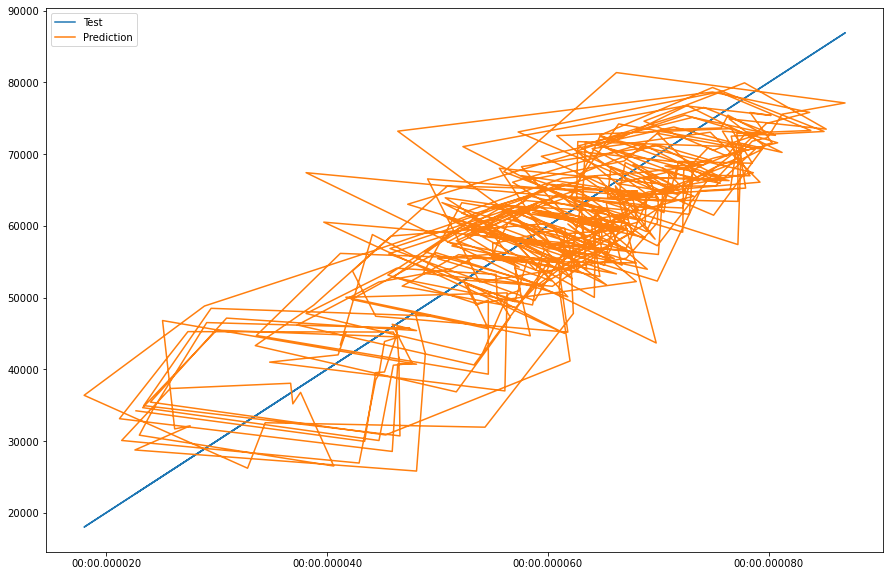

In [281]:
#df = pd.read_csv('population.csv', encoding="shift_jis")
L = len(df)
Y = df.iloc[:, 0]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

# train, testデータを定義
X_train = X[:190, :, :]
X_test = X[190:, :, :]
Y_train = Y[:190, :]
Y_test = Y[190:, :]

model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)
Predict = model.predict(X_test)

# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:193,0])

Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[193:,0])

Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[193:,0])

plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

array([[0.60922541],
       [0.48738033],
       [0.89556136],
       [0.89556136],
       [0.88685814],
       [0.93037424],
       [1.        ],
       [0.7154047 ],
       [0.61792863],
       [0.56222802],
       [0.90426458],
       [0.93907746],
       [0.94778068],
       [0.98259356],
       [0.6362054 ],
       [0.58746736],
       [0.63968668],
       [0.65796345],
       [0.66753699],
       [0.6483899 ],
       [0.70234987],
       [0.51436031],
       [0.40208877],
       [0.59442994],
       [0.60922541],
       [0.63272411],
       [0.63881636],
       [0.6562228 ],
       [0.46997389],
       [0.37510879],
       [0.60226284],
       [0.61444735],
       [0.6205396 ],
       [0.6048738 ],
       [0.63794604],
       [0.44995648],
       [0.36901654],
       [0.58572672],
       [0.36553525],
       [0.63446475],
       [0.64926023],
       [0.66492602],
       [0.46823325],
       [0.32898172],
       [0.59530026],
       [0.62228024],
       [0.57441253],
       [0.570

# データの前処理
## 人流データ

In [275]:
df = pd.read_csv('population.csv', parse_dates=[0], index_col=0)
df

,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪難波,札幌大通,仙台駅,福岡天神
日付,,,,,,,,,,
2020-01-01,40300,32800,81600,28900,6700,4600,32500,8200,14100,10900
2020-01-02,59500,60300,118000,36300,8600,7400,52200,22200,36300,32600
2020-01-03,70000,60100,120000,40200,8900,7000,56300,19600,33400,28200
2020-01-04,78100,64400,118000,40100,10600,8200,57400,21200,31600,28200
2020-01-05,64100,52500,103000,36600,9400,6400,44200,17900,24800,20800
...,...,...,...,...,...,...,...,...,...,...
2021-09-18,50700,38200,53000,20100,12000,4400,25500,11400,15000,11400
2021-09-19,62200,46900,59400,21800,15000,4900,30200,10100,16800,10200
2021-09-20,57300,43100,61200,23300,14800,4900,26500,9700,15500,9400


## 感染者数データ

In [276]:
df_tokyo = pd.read_csv('case.csv', parse_dates=[0], index_col=0)
df_tokyo = df_tokyo[df_tokyo['Prefecture']=='Tokyo']
df_tokyo = df_tokyo.drop(columns="Prefecture", axis=1)
df_tokyo = df_tokyo[:-6]
df_tokyo

,cases
Date,
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
2020-01-30,0
...,...
2021-09-18,862
2021-09-19,565
2021-09-20,302


## 検索データ

In [277]:
df_word = pd.read_csv('word.csv', parse_dates=[0], index_col=0)
pd.set_option('display.max_columns', None)
df_word

,渋谷＊,新宿＊,丸の内＊,品川＊,下北沢＊,八王子＊,大阪＊,札幌＊,仙台＊,福岡＊,東京 コロナ,コロナ 感染者数,コロナ ワクチン,コロナ 初期症状,コロナ 潜伏期間,緊急事態宣言,緊急事態宣言 東京,緊急事態宣言 再発令,緊急事態宣言とは,緊急事態宣言 解除,緊急事態宣言 仕事,大阪府 コロナウイルス感染者,大阪府 緊急事態宣言,北海道 コロナウイルス感染者,北海道 緊急事態宣言,宮城県 コロナウイルス感染者,宮城県 緊急事態宣言,福岡県 コロナウイルス感染者,福岡県 緊急事態宣言,デルタ株,ラムダ株,リモート とは,リモートワーク,リモート飲み会,居酒屋,飲み会,旅行,飲食店,営業時間,デリバリー,テイクアウト,コンビニ,マスク,アルコール,ランチ,美容院,カラオケ,温泉,チケット,新幹線,飛行機,レストラン,レシピ,動画,漫画,ゲーム,公園,自転車,台風,大雨
日付,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2400,2700,160,260,330,1200,5400,3500,1600,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,380,30,1200,210,30,370,120,2100,250,250,250,510,2000,1700,450,3600,990,110,850,1300,3700,2400,180,1600,120,0
2020-01-02,1500,3400,230,260,390,1400,5800,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,800,10,1200,270,50,370,140,1400,310,140,470,790,2200,1700,510,4700,1000,150,960,1500,4100,2500,200,1800,230,0
2020-01-03,1900,3800,200,340,540,1400,6300,4000,2000,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,760,20,1300,230,70,480,140,1300,330,180,510,1000,2200,1800,520,5500,1100,130,1000,1700,4700,2200,300,2100,120,0
2020-01-04,1800,3600,200,350,660,1400,6500,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,810,20,1300,210,10,450,200,1300,790,240,560,1200,2100,1700,540,5700,1100,150,1100,1800,4500,2000,280,2400,110,0
2020-01-05,1400,2900,160,590,660,1400,6300,4000,1600,2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,100,0,560,20,1500,270,10,450,170,1300,520,200,500,1100,2100,1500,550,5300,1200,50,1200,1800,4600,1800,260,2500,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-18,820,1500,160,260,450,1500,1300,2400,620,910,62100,32400,16400,8900,3200,17100,600,30,20,570,0,240,50,20,430,50,190,11400,220,420,110,420,300,20,270,30,690,250,40,680,940,1100,3400,380,760,1500,1300,1000,600,6300,580,410,1400,2700,5300,2400,410,3100,63900,220
2021-09-19,820,1600,200,230,580,1600,1200,2400,560,840,57600,34000,14200,8500,2900,18700,680,10,30,860,0,260,100,20,370,40,150,13400,190,320,120,400,240,10,260,0,610,270,30,560,950,1100,3000,310,840,1300,1400,1000,340,2300,420,440,1200,2300,5000,2100,970,4000,6600,0
2021-09-20,770,1600,140,140,550,1600,1200,2200,500,760,52100,35800,13600,9500,3200,21900,930,0,40,1800,0,250,110,20,370,60,130,12500,170,460,130,470,290,20,220,20,630,240,20,700,720,1000,3100,390,840,1300,1200,1100,370,2400,540,400,1300,2400,4800,2300,840,4300,1900,0


## データの結合

In [278]:
df = pd.concat([df, df_tokyo, df_word], axis=1)
df

,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪難波,札幌大通,仙台駅,福岡天神,cases,渋谷＊,新宿＊,丸の内＊,品川＊,下北沢＊,八王子＊,大阪＊,札幌＊,仙台＊,福岡＊,東京 コロナ,コロナ 感染者数,コロナ ワクチン,コロナ 初期症状,コロナ 潜伏期間,緊急事態宣言,緊急事態宣言 東京,緊急事態宣言 再発令,緊急事態宣言とは,緊急事態宣言 解除,緊急事態宣言 仕事,大阪府 コロナウイルス感染者,大阪府 緊急事態宣言,北海道 コロナウイルス感染者,北海道 緊急事態宣言,宮城県 コロナウイルス感染者,宮城県 緊急事態宣言,福岡県 コロナウイルス感染者,福岡県 緊急事態宣言,デルタ株,ラムダ株,リモート とは,リモートワーク,リモート飲み会,居酒屋,飲み会,旅行,飲食店,営業時間,デリバリー,テイクアウト,コンビニ,マスク,アルコール,ランチ,美容院,カラオケ,温泉,チケット,新幹線,飛行機,レストラン,レシピ,動画,漫画,ゲーム,公園,自転車,台風,大雨
2020-01-01,40300,32800,81600,28900,6700,4600,32500,8200,14100,10900,NaN,2400,2700,160,260,330,1200,5400,3500,1600,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,380,30,1200,210,30,370,120,2100,250,250,250,510,2000,1700,450,3600,990,110,850,1300,3700,2400,180,1600,120,0
2020-01-02,59500,60300,118000,36300,8600,7400,52200,22200,36300,32600,NaN,1500,3400,230,260,390,1400,5800,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,800,10,1200,270,50,370,140,1400,310,140,470,790,2200,1700,510,4700,1000,150,960,1500,4100,2500,200,1800,230,0
2020-01-03,70000,60100,120000,40200,8900,7000,56300,19600,33400,28200,NaN,1900,3800,200,340,540,1400,6300,4000,2000,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,760,20,1300,230,70,480,140,1300,330,180,510,1000,2200,1800,520,5500,1100,130,1000,1700,4700,2200,300,2100,120,0
2020-01-04,78100,64400,118000,40100,10600,8200,57400,21200,31600,28200,NaN,1800,3600,200,350,660,1400,6500,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,810,20,1300,210,10,450,200,1300,790,240,560,1200,2100,1700,540,5700,1100,150,1100,1800,4500,2000,280,2400,110,0
2020-01-05,64100,52500,103000,36600,9400,6400,44200,17900,24800,20800,NaN,1400,2900,160,590,660,1400,6300,4000,1600,2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,100,0,560,20,1500,270,10,450,170,1300,520,200,500,1100,2100,1500,550,5300,1200,50,1200,1800,4600,1800,260,2500,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-18,50700,38200,53000,20100,12000,4400,25500,11400,15000,11400,862.0,820,1500,160,260,450,1500,1300,2400,620,910,62100,32400,16400,8900,3200,17100,600,30,20,570,0,240,50,20,430,50,190,11400,220,420,110,420,300,20,270,30,690,250,40,680,940,1100,3400,380,760,1500,1300,1000,600,6300,580,410,1400,2700,5300,2400,410,3100,63900,220
2021-09-19,62200,46900,59400,21800,15000,4900,30200,10100,16800,10200,565.0,820,1600,200,230,580,1600,1200,2400,560,840,57600,34000,14200,8500,2900,18700,680,10,30,860,0,260,100,20,370,40,150,13400,190,320,120,400,240,10,260,0,610,270,30,560,950,1100,3000,310,840,1300,1400,1000,340,2300,420,440,1200,2300,5000,2100,970,4000,6600,0
2021-09-20,57300,43100,61200,23300,14800,4900,26500,9700,15500,9400,302.0,770,1600,140,140,550,1600,1200,2200,500,760,52100,35800,13600,9500,3200,21900,930,0,40,1800,0,250,110,20,370,60,130,12500,170,460,130,470,290,20,220,20,630,240,20,700,720,1000,3100,390,840,1300,1200,1100,370,2400,540,400,1300,2400,4800,2300,840,4300,1900,0
2021-09-21,66700,49900,88300,40000,16500,6100,31400,16800,19600,16100,253.0,580,1100,160,140,610,1600,1200,2200,500,620,54400,36400,15700,9700,3400,24800,1300,0,20,2200,0,300,150,40,430,50,160,12500,260,490,120,470,350,0,230,10,560,260,70,390,380,970,3300,300,510,1200,790,640,310,1800,420,310,1100,2200,4200,1700,230,3300,2000,10


In [279]:
df = df.fillna(0)

In [280]:
df

,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪難波,札幌大通,仙台駅,福岡天神,cases,渋谷＊,新宿＊,丸の内＊,品川＊,下北沢＊,八王子＊,大阪＊,札幌＊,仙台＊,福岡＊,東京 コロナ,コロナ 感染者数,コロナ ワクチン,コロナ 初期症状,コロナ 潜伏期間,緊急事態宣言,緊急事態宣言 東京,緊急事態宣言 再発令,緊急事態宣言とは,緊急事態宣言 解除,緊急事態宣言 仕事,大阪府 コロナウイルス感染者,大阪府 緊急事態宣言,北海道 コロナウイルス感染者,北海道 緊急事態宣言,宮城県 コロナウイルス感染者,宮城県 緊急事態宣言,福岡県 コロナウイルス感染者,福岡県 緊急事態宣言,デルタ株,ラムダ株,リモート とは,リモートワーク,リモート飲み会,居酒屋,飲み会,旅行,飲食店,営業時間,デリバリー,テイクアウト,コンビニ,マスク,アルコール,ランチ,美容院,カラオケ,温泉,チケット,新幹線,飛行機,レストラン,レシピ,動画,漫画,ゲーム,公園,自転車,台風,大雨
2020-01-01,40300,32800,81600,28900,6700,4600,32500,8200,14100,10900,0.0,2400,2700,160,260,330,1200,5400,3500,1600,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,380,30,1200,210,30,370,120,2100,250,250,250,510,2000,1700,450,3600,990,110,850,1300,3700,2400,180,1600,120,0
2020-01-02,59500,60300,118000,36300,8600,7400,52200,22200,36300,32600,0.0,1500,3400,230,260,390,1400,5800,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,800,10,1200,270,50,370,140,1400,310,140,470,790,2200,1700,510,4700,1000,150,960,1500,4100,2500,200,1800,230,0
2020-01-03,70000,60100,120000,40200,8900,7000,56300,19600,33400,28200,0.0,1900,3800,200,340,540,1400,6300,4000,2000,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,760,20,1300,230,70,480,140,1300,330,180,510,1000,2200,1800,520,5500,1100,130,1000,1700,4700,2200,300,2100,120,0
2020-01-04,78100,64400,118000,40100,10600,8200,57400,21200,31600,28200,0.0,1800,3600,200,350,660,1400,6500,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,810,20,1300,210,10,450,200,1300,790,240,560,1200,2100,1700,540,5700,1100,150,1100,1800,4500,2000,280,2400,110,0
2020-01-05,64100,52500,103000,36600,9400,6400,44200,17900,24800,20800,0.0,1400,2900,160,590,660,1400,6300,4000,1600,2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,100,0,560,20,1500,270,10,450,170,1300,520,200,500,1100,2100,1500,550,5300,1200,50,1200,1800,4600,1800,260,2500,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-18,50700,38200,53000,20100,12000,4400,25500,11400,15000,11400,862.0,820,1500,160,260,450,1500,1300,2400,620,910,62100,32400,16400,8900,3200,17100,600,30,20,570,0,240,50,20,430,50,190,11400,220,420,110,420,300,20,270,30,690,250,40,680,940,1100,3400,380,760,1500,1300,1000,600,6300,580,410,1400,2700,5300,2400,410,3100,63900,220
2021-09-19,62200,46900,59400,21800,15000,4900,30200,10100,16800,10200,565.0,820,1600,200,230,580,1600,1200,2400,560,840,57600,34000,14200,8500,2900,18700,680,10,30,860,0,260,100,20,370,40,150,13400,190,320,120,400,240,10,260,0,610,270,30,560,950,1100,3000,310,840,1300,1400,1000,340,2300,420,440,1200,2300,5000,2100,970,4000,6600,0
2021-09-20,57300,43100,61200,23300,14800,4900,26500,9700,15500,9400,302.0,770,1600,140,140,550,1600,1200,2200,500,760,52100,35800,13600,9500,3200,21900,930,0,40,1800,0,250,110,20,370,60,130,12500,170,460,130,470,290,20,220,20,630,240,20,700,720,1000,3100,390,840,1300,1200,1100,370,2400,540,400,1300,2400,4800,2300,840,4300,1900,0
2021-09-21,66700,49900,88300,40000,16500,6100,31400,16800,19600,16100,253.0,580,1100,160,140,610,1600,1200,2200,500,620,54400,36400,15700,9700,3400,24800,1300,0,20,2200,0,300,150,40,430,50,160,12500,260,490,120,470,350,0,230,10,560,260,70,390,380,970,3300,300,510,1200,790,640,310,1800,420,310,1100,2200,4200,1700,230,3300,2000,10


## 単変量解析

In [254]:
L = len(df)
Y = df.iloc[:, 0]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [255]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

In [256]:
# train, testデータを定義
X_train = X[:618, :, :]
X_test = X[618:, :, :]
Y_train = Y[:618, :]
Y_test = Y[618:, :]

In [257]:
Y

array([[0.74102564],
       [0.58846154],
       [0.87435897],
       [0.84102564],
       [0.86025641],
       [0.88205128],
       [0.99487179],
       [0.85512821],
       [0.76666667],
       [0.64615385],
       [0.86923077],
       [0.90897436],
       [0.92179487],
       [1.        ],
       [0.78717949],
       [0.67820513],
       [0.66794872],
       [0.68205128],
       [0.70512821],
       [0.66538462],
       [0.7974359 ],
       [0.71410256],
       [0.53333333],
       [0.62564103],
       [0.62692308],
       [0.69230769],
       [0.67948718],
       [0.7474359 ],
       [0.60512821],
       [0.47820513],
       [0.60641026],
       [0.62820513],
       [0.65641026],
       [0.62051282],
       [0.71794872],
       [0.60128205],
       [0.47820513],
       [0.66666667],
       [0.48461538],
       [0.62051282],
       [0.61025641],
       [0.68333333],
       [0.57307692],
       [0.40897436],
       [0.57435897],
       [0.60384615],
       [0.5974359 ],
       [0.562

In [249]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

In [250]:
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)
Predict = model.predict(X_test)

Epoch 1/100
 - 1s - loss: 0.1328 - mean_absolute_error: 0.3357
Epoch 2/100
 - 0s - loss: 0.0813 - mean_absolute_error: 0.2572
Epoch 3/100
 - 0s - loss: 0.0471 - mean_absolute_error: 0.1915
Epoch 4/100
 - 0s - loss: 0.0243 - mean_absolute_error: 0.1344
Epoch 5/100
 - 0s - loss: 0.0133 - mean_absolute_error: 0.0951
Epoch 6/100
 - 0s - loss: 0.0103 - mean_absolute_error: 0.0788
Epoch 7/100
 - 0s - loss: 0.0097 - mean_absolute_error: 0.0764
Epoch 8/100
 - 0s - loss: 0.0092 - mean_absolute_error: 0.0740
Epoch 9/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0725
Epoch 10/100
 - 0s - loss: 0.0084 - mean_absolute_error: 0.0702
Epoch 11/100
 - 0s - loss: 0.0080 - mean_absolute_error: 0.0695
Epoch 12/100
 - 0s - loss: 0.0078 - mean_absolute_error: 0.0678
Epoch 13/100
 - 0s - loss: 0.0077 - mean_absolute_error: 0.0681
Epoch 14/100
 - 0s - loss: 0.0075 - mean_absolute_error: 0.0672
Epoch 15/100
 - 0s - loss: 0.0074 - mean_absolute_error: 0.0674
Epoch 16/100
 - 0s - loss: 0.0073 - mean_absolute

In [251]:
Predict

array([[0.42102298],
       [0.46301892],
       [0.4385222 ],
       [0.47540444],
       [0.4798766 ],
       [0.5117291 ],
       [0.42406762],
       [0.50628346],
       [0.4449346 ],
       [0.5286606 ]], dtype=float32)

In [252]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:621,0])
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[621:,0])

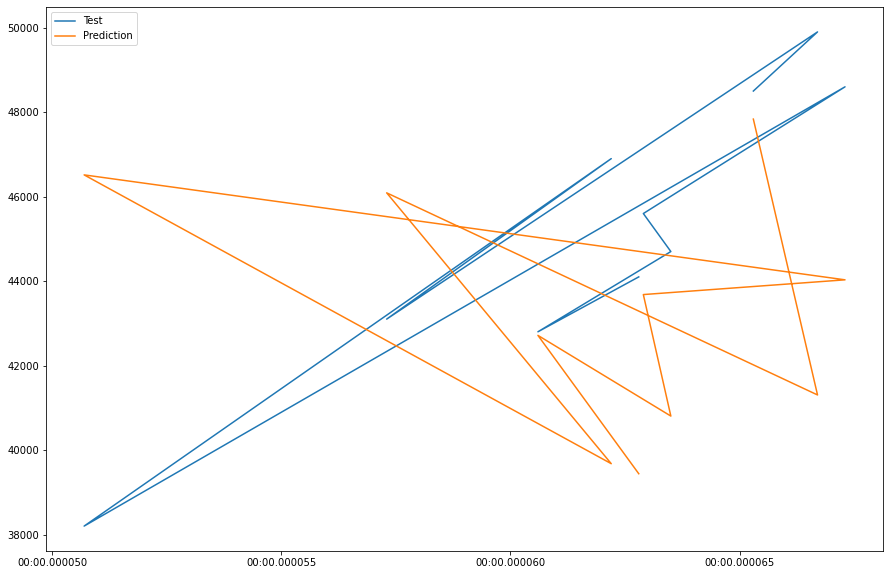

In [253]:
Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[621:,0])
plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [236]:
Predict = np.array(Predict, dtype=int).T
a = np.abs(Y_test.values - Predict)/Y_test.values
np.mean(a)*100

161.19711364806426

## 多変量解析

In [153]:
df.iloc[:,1]

2020-01-01    32800
2020-01-02    60300
2020-01-03    60100
2020-01-04    64400
2020-01-05    52500
              ...  
2021-09-18    38200
2021-09-19    46900
2021-09-20    43100
2021-09-21    49900
2021-09-22    48500
Freq: D, Name: 新宿, Length: 631, dtype: int64

In [ ]:
L = len(df)

word = np.array([df.iloc[:, 11]])
case = np.array([df.iloc[:, 10]])
pop = np.array([df.iloc[:, 0]])

# 入力データ、出力データ作成
word = pop.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）
case = case.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）
pop = word.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

word1 = pop[0:L-3, :]  # 予測対象日の3日前のデータ
case1 = case[0:L-3, :]  # 予測対象日の3日前のデータ
pop1 = word[0:L-3, :]  # 予測対象日の3日前のデータ
word2 = pop[1:L-2, :]  # 予測対象日の2日前のデータ
case2 = case[1:L-2, :]  # 予測対象日の2日前のデータ
pop2 = word[1:L-2, :]  # 予測対象日の2日前のデータ
word3 = pop[2:L-1, :]  # 予測対象日の前日データ
case3 = case[2:L-1, :]  # 予測対象日の前日のデータ
pop3 = word[2:L-1, :]  # 予測対象日の前日のデータ

X = np.concatenate([word1, case1, pop1, word2, case2, pop2, word3, case3, pop3], axis=1)
Y = pop[3:L, :]  # 予測対象日のデータ

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
print(X.shape)

X_train = X[:618, :, :]
X_test = X[618:, :, :]
Y_train = Y[:618, :]
Y_test = Y[618:, :]
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(1, 9), recurrent_activation='hard_sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)
Predict = model.predict(X_test, verbose=1)

In [158]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:621,0])

Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[621:,0])

Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[621:,0])

,0
渋谷,
1970-01-01 00:00:00.000078100,1.184709e+20
1970-01-01 00:00:00.000064100,9.723410e+19
1970-01-01 00:00:00.000111000,1.683772e+20
1970-01-01 00:00:00.000111000,1.683772e+20
1970-01-01 00:00:00.000110000,1.668603e+20
...,...
1970-01-01 00:00:00.000060100,9.116645e+19
1970-01-01 00:00:00.000057700,8.752587e+19
1970-01-01 00:00:00.000067200,1.019365e+20


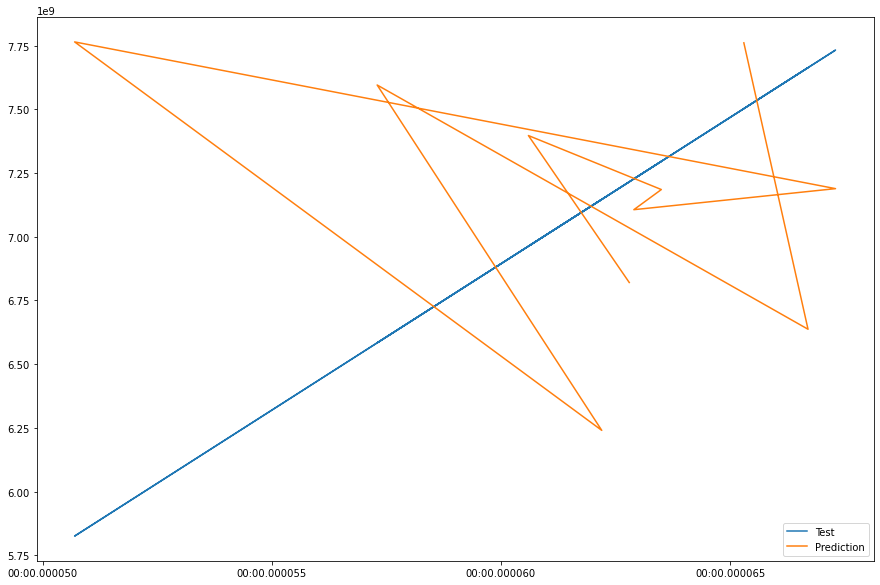

In [156]:
plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()